# Tests of GD Convergence Depth

This document is a test of the hidden-layer depth threshold for different monomial activation functions. Specifically, SGL and Manelli found that 
$$ k \geq 2d $$
is sufficient for ensuring GD converges to 0 and has no spurious local minima. We seek to find the relationship between $k$ and $d$ for other monomials

Here we will use a single-layer monomial-activation neural network. In some tests, all the output weights are set to 1 to better match Manelli, but not always.

In [1]:
# inport nn files
from experiment import *
from monomial_neural_network import *
import matplotlib.pyplot as plt
import numpy as np

In [13]:
## Create a function that will make data and train a neural network using a given number of data points and epochs
def test_training(n, k_stud, k_teach, M):
    # n is the number of data points
    # k is the hidden layer depth
    # M is the number of epochs

    d = 5 # just fix the dimension of the data for now
    teacher_k = [k_teach] # single layer
    teacher_model = generate_teacher_model_noOutWeight(d, teacher_k) # use unit weights for these calculations
    # teacher_model = generate_teacher_model(d, teacher_k)
    print(teacher_model)

    # generate data
    data = generate_data(n, d, teacher_model)

    # create student
    student_k = [k_stud] # student model hidden layer sizes - 2 layers with increasing number of neurons
    student_model = generate_student_model_noOutWeight(d, student_k)
    # student_model = generate_student_model(d, k=student_k)

    # train the student
    student_model, losses = train(
        model = student_model, 
        x_train = data[0], 
        y_train= data[1], 
        num_epochs = M, 
        lr = 0.2e-4,
        print_stuff=False
        )
    
    # print(student_model.layers[0].weight)
    # print(student_model.layers[2].weight)
    # print(teacher_model.layers[0].weight)
    # print(teacher_model.layers[2].weight)
    student_w = student_model.layers[0].weight.detach().numpy()
    teacher_w = teacher_model.layers[0].weight.detach().numpy()
    # return the final loss
    return losses, student_w, teacher_w

MonomialNeuralNetwork_noOutputWeight(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=30, bias=False)
    (1): Monomial()
    (2): Linear(in_features=30, out_features=1, bias=False)
  )
)
starting training

Training Complete
6.989423127379268e-06
[[ 0.14044762  0.42134768 -0.13701762  0.02460368  0.10243857]
 [ 0.42134768 -0.34375572 -0.1340912  -0.72729564 -0.24829912]
 [-0.13701762 -0.1340912   0.42014837 -0.23089486 -0.14025629]
 [ 0.02460368 -0.72729564 -0.23089486  0.3878746  -0.10085697]
 [ 0.10243857 -0.24829912 -0.14025629 -0.10085697 -0.17661285]]
[10.476382   2.4388533  4.393647   5.323541   6.5326767]
[10.457494   2.5761125  4.2748375  5.2956705  6.132884 ]


Text(0.5, 0, 'Iteration')

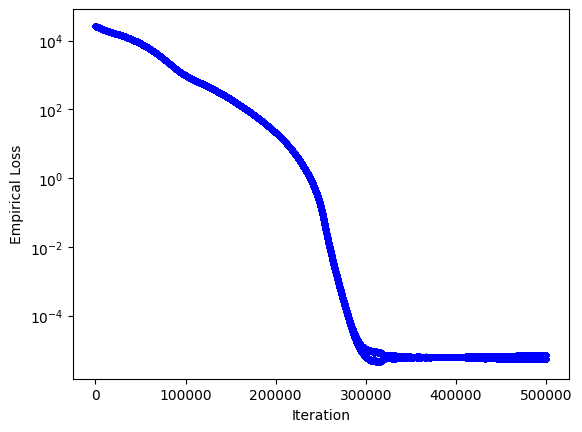

In [20]:
# test out the function
l, stud_w, teach_w = test_training(n=1000, k_stud=30, k_teach=30, M=500000)
print(l[-1])
print(stud_w.T@stud_w - teach_w.T@teach_w)
stud_eig, stud_eig_vec = np.linalg.eig(stud_w.T@stud_w)
teach_eig, teach_eig_vec = np.linalg.eig(teach_w.T@teach_w)
print(stud_eig)
print(teach_eig)
fig = plt.figure()
plt.semilogy(np.arange(len(l)),l,'b.')
plt.ylabel("Empirical Loss")
plt.xlabel("Iteration")

m=12
MonomialNeuralNetwork_noOutputWeight(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=False)
    (1): Monomial()
    (2): Linear(in_features=20, out_features=1, bias=False)
  )
)
starting training

Training Complete
m=15
MonomialNeuralNetwork_noOutputWeight(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=False)
    (1): Monomial()
    (2): Linear(in_features=20, out_features=1, bias=False)
  )
)
starting training

Training Complete
m=18
MonomialNeuralNetwork_noOutputWeight(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=False)
    (1): Monomial()
    (2): Linear(in_features=20, out_features=1, bias=False)
  )
)
starting training

Training Complete
m=22
MonomialNeuralNetwork_noOutputWeight(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=20, bias=False)
    (1): Monomial()
    (2): Linear(in_features=20, out_features=1, bias=False)
  )
)
starting training

Training Complete


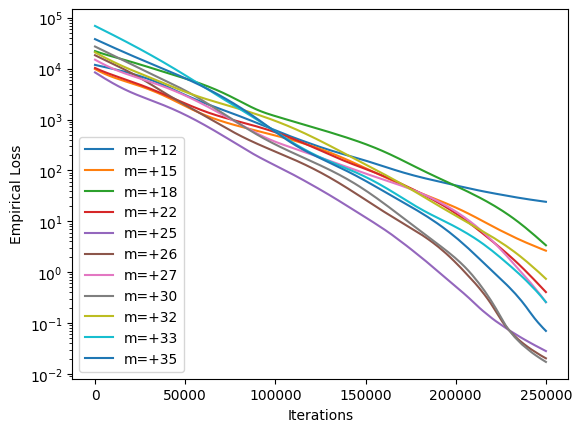

In [18]:
# try a bunch of teacher m's with the student m fixed
mvec = [12,15,18,22,25,26,27,30,32,33,35]
losses = []
teach_ws = []
stud_ws = []
for m in mvec:
    print("m="+str(m))
    l, stud_w, teach_w = test_training(n=1000, k_stud=m, k_teach=20, M=250000)
    losses.append(l)
    teach_ws.append(teach_w)
    stud_ws.append(stud_w)

plt.figure()
for idx,loss in enumerate(losses):
    plt.semilogy(loss,label="m=+"+str(mvec[idx]))

plt.xlabel("Iterations")
plt.ylabel("Empirical Loss")
plt.legend()
